# Introduction

In this scenario, I am a junior data analyst working for the marketing analytics team at Bellabeat, which is a a high-tech manufacturer of health-focused products for women. I was asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. Although it is a small successful company, Bellabeat has the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. I will present the results of my analysis, as well as key high-level recommendations to the executive team. The results of my analysis will then help in guiding the marketing strategy of the company.

* Characters

○ Urška Sršen: Bellabeat’s co-founder and Chief Creative Officer

○ Sando Mur: Mathematician and Bellabeat’s cofounder; a key member of the Bellabeat executive team

○ Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

* Products

○ Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

○ Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf Tracker connects to the Bellabeat app to track activity, sleep, and stress.

○ Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.

○ Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.

○ Bellabeat membership: Bellabeat also offers a subscription-based membership program for users.
Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness-based on their lifestyle and goals.

To learn more about the company itself please visit [here](https://bellabeat.com/).

# Step 1: Ask

Key stages:

**1. Identifying the business task**

The business task is to analyze smart device usage data to gain insight into how consumers use non-Bellabeat smart devices. Then the insights discovered need to be applied to one Bellabeat product which I will select. The questions which will help to guide my analysis are:
* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat's marketing strategy?

**2. Considering key stakeholders**

The main stakeholders are Urška Sršen, Sando Mur, and the Bellabeat marketing analytics team.

# Step 2: Prepare

Key stages:

**1.Downloading data and storing it**

For my analysis I am going to use [Fitbit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) available on Kaggle (CC0: Public Domain, dataset made available through [Mobius](https://www.kaggle.com/arashnic)). This dataset contains a personal fitness tracker from thirty Fitbit users generated by their responses to a distributed survey via Amazon Mechanical Turk between 03.12.2016 and 05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits. The data is downloaded and stored locally on my desktop.

**2. Identifying how it’s organized**

The data is organized by months. There are 29 files in total. There is data from March to April under one folder; and from April to May - under another folder. The data has a long format, which means that values do repeat in the first column. Some files are the merged versions of different separate files. The data has its limitations - only 35 users participated in a survey, and this might not represent the whole population. There is also limited information on the age groups of representatives which might make the data look biased.

**3. Determining the credibility of data**

The data comes from a reliable source and is licensed under [Public Domain](https://creativecommons.org/publicdomain/zero/1.0/). The participants were real users of Fitbit Fitness Tracker. Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. 

**4. Sorting and filtering data**

To start working with data, I will start by importing the required packages and then uploading CSV files. I will then inspect the relevant data frames, combine the ones that I find useful, and remove the ones that are not needed.

In [1]:
# uploading Python package for data analysis

import pandas as pd

# uploading main datasets which I will begin my analysis with

dly_act_03_04 = pd.read_csv('/kaggle/input/fitbit-dataset-march-through-may-2016/dailyActivity_merged.csv')
dly_act_04_05 = pd.read_csv ('/kaggle/input/fitbit-dataset-march-through-may-2016/4.12_5.12_dailyActivity_merged.csv')
hrt_rt_03_04 = pd.read_csv('/kaggle/input/fitbit-dataset-march-through-may-2016/heartrate_seconds_merged.csv')
hrt_rt_04_05 = pd.read_csv('/kaggle/input/fitbit-dataset-march-through-may-2016/4.12_5.12_heartrate_seconds_merged.csv')
hrly_clr_03_04 = pd.read_csv('/kaggle/input/fitbit-dataset-march-through-may-2016/hourlyCalories_merged.csv')
hrly_clr_04_05 = pd.read_csv('/kaggle/input/fitbit-dataset-march-through-may-2016/4.12_5.12_hourlyCalories_merged.csv')
hrly_stps_03_04 = pd.read_csv('/kaggle/input/fitbit-dataset-march-through-may-2016/hourlySteps_merged.csv')
hrly_stps_04_05 = pd.read_csv('/kaggle/input/fitbit-dataset-march-through-may-2016/4.12_5.12_hourlySteps_merged.csv')
mnt_MET_03_04 = pd.read_csv('/kaggle/input/fitbit-dataset-march-through-may-2016/minuteMETsNarrow_merged.csv')
mnt_MET_04_05 = pd.read_csv('/kaggle/input/fitbit-dataset-march-through-may-2016/4.12_5.12_minuteMETsNarrow_merged.csv')
slp_dy = pd.read_csv('/kaggle/input/fitbit-dataset-march-through-may-2016/4.12_5.12_sleepDay_merged.csv')
wght_log_info_03_04 = pd.read_csv('/kaggle/input/fitbit-dataset-march-through-may-2016/weightLogInfo_merged.csv')
wght_log_info_04_05 = pd.read_csv('/kaggle/input/fitbit-dataset-march-through-may-2016/4.12_5.12_weightLogInfo_merged.csv')



I am going to combine the same datasets from different months into single data frames. For this purpose, I will check the column names, and data types of columns in each file, because those need to match.

In [2]:
# starting with the `dailyActivity` files - checking column names and data types

print(list(dly_act_03_04.columns))
print(dly_act_03_04.dtypes)

['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']
Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object


In [3]:
print(list(dly_act_04_05.columns))
print(dly_act_04_05.dtypes)

['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']
Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object


In [4]:
# combining the dataframes `dly_act_03_04` and `dly_act_04_05`

dly_act_merged = pd.concat([dly_act_03_04, dly_act_04_05], ignore_index=True)
dly_act_merged.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [5]:
print(list(dly_act_merged.columns))
print(dly_act_merged.dtypes)

['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']
Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object


In [6]:
# following the same approach for the `heartrate_seconds` files

print(list(hrt_rt_03_04.columns))
print(hrt_rt_03_04.dtypes)

['Id', 'Time', 'Value']
Id        int64
Time     object
Value     int64
dtype: object


In [7]:
print(list(hrt_rt_04_05.columns))
print(hrt_rt_04_05.dtypes)

['Id', 'Time', 'Value']
Id        int64
Time     object
Value     int64
dtype: object


In [8]:
hrt_rt_merged = pd.concat([hrt_rt_03_04, hrt_rt_04_05], ignore_index=True)
hrt_rt_merged.head(5)

,Id,Time,Value
0,2022484408,4/1/2016 7:54:00 AM,93
1,2022484408,4/1/2016 7:54:05 AM,91
2,2022484408,4/1/2016 7:54:10 AM,96
3,2022484408,4/1/2016 7:54:15 AM,98
4,2022484408,4/1/2016 7:54:20 AM,100


In [9]:
# `hourly_calories` files

print(list(hrly_clr_03_04.columns))
print(hrly_clr_03_04.dtypes)

['Id', 'ActivityHour', 'Calories']
Id               int64
ActivityHour    object
Calories         int64
dtype: object


In [10]:
print(list(hrly_clr_04_05.columns))
print(hrly_clr_04_05.dtypes)

['Id', 'ActivityHour', 'Calories']
Id               int64
ActivityHour    object
Calories         int64
dtype: object


In [11]:
hrly_clr_merged = pd.concat([hrly_clr_03_04, hrly_clr_04_05], ignore_index=True)
hrly_clr_merged.head(5)

,Id,ActivityHour,Calories
0,1503960366,3/12/2016 12:00:00 AM,48
1,1503960366,3/12/2016 1:00:00 AM,48
2,1503960366,3/12/2016 2:00:00 AM,48
3,1503960366,3/12/2016 3:00:00 AM,48
4,1503960366,3/12/2016 4:00:00 AM,48


In [12]:
# `hourly_steps` files

print(list(hrly_stps_03_04.columns))
print(hrly_stps_03_04.dtypes)

['Id', 'ActivityHour', 'StepTotal']
Id               int64
ActivityHour    object
StepTotal        int64
dtype: object


In [13]:
print(list(hrly_stps_04_05.columns))
print(hrly_stps_04_05.dtypes)

['Id', 'ActivityHour', 'StepTotal']
Id               int64
ActivityHour    object
StepTotal        int64
dtype: object


In [14]:
hrly_stps_merged = pd.concat([hrly_stps_03_04, hrly_stps_04_05], ignore_index=True)
hrly_stps_merged.head(5)

,Id,ActivityHour,StepTotal
0,1503960366,3/12/2016 12:00:00 AM,0
1,1503960366,3/12/2016 1:00:00 AM,0
2,1503960366,3/12/2016 2:00:00 AM,0
3,1503960366,3/12/2016 3:00:00 AM,0
4,1503960366,3/12/2016 4:00:00 AM,0


In [15]:
# `minuteMETs` files

print(list(mnt_MET_03_04.columns))
print(mnt_MET_03_04.dtypes)

['Id', 'ActivityMinute', 'METs']
Id                 int64
ActivityMinute    object
METs               int64
dtype: object


In [16]:
print(list(mnt_MET_04_05.columns))
print(mnt_MET_04_05.dtypes)

['Id', 'ActivityMinute', 'METs']
Id                 int64
ActivityMinute    object
METs               int64
dtype: object


In [17]:
mnt_MET_merged = pd.concat([mnt_MET_03_04, mnt_MET_04_05], ignore_index=True)
mnt_MET_merged.head(5)

,Id,ActivityMinute,METs
0,1503960366,3/12/2016 12:00:00 AM,10
1,1503960366,3/12/2016 12:01:00 AM,10
2,1503960366,3/12/2016 12:02:00 AM,10
3,1503960366,3/12/2016 12:03:00 AM,10
4,1503960366,3/12/2016 12:04:00 AM,10


In [18]:
#`sleep day` file - single file, no need to merge
# checking its columns and data types

print(list(slp_dy.columns))
print(slp_dy.dtypes)

['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']
Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object


In [19]:
slp_dy.head(5)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [20]:
# `weightLogInfo files`

print(list(wght_log_info_03_04.columns))
print(wght_log_info_03_04.dtypes)

['Id', 'Date', 'WeightKg', 'WeightPounds', 'Fat', 'BMI', 'IsManualReport', 'LogId']
Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object


In [21]:
print(list(wght_log_info_04_05.columns))
print(wght_log_info_04_05.dtypes)

['Id', 'Date', 'WeightKg', 'WeightPounds', 'Fat', 'BMI', 'IsManualReport', 'LogId']
Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object


In [22]:
wght_log_info_merged = pd.concat([wght_log_info_03_04, wght_log_info_04_05], ignore_index=True)
wght_log_info_merged.head(5)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,4/5/2016 11:59:59 PM,53.299999,117.506384,22.0,22.969999,True,1459900799000
1,1927972279,4/10/2016 6:33:26 PM,129.600006,285.719105,NaN,46.169998,False,1460313206000
2,2347167796,4/3/2016 11:59:59 PM,63.400002,139.773078,10.0,24.770000,True,1459727999000
3,2873212765,4/6/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1459987199000
4,2873212765,4/7/2016 11:59:59 PM,57.200001,126.104416,NaN,21.650000,True,1460073599000


Now that we have merged all the necessary files into single data frames, we have the following files ready for the Process step of our analysis: `dly_act_merged`, `hrt_rt_merged`, `hrly_clr_merged`, `hrly_stps_merged`, `mnt_MET_merged`, `wght_log_info_merged`, and `slp_dy`.

# Step 3: Process

Key Stages:

**1. Checking the data for errors**

In [23]:
# checking the number of unique IDs in each dataframe created

print(len(pd.unique(dly_act_merged['Id'])))
print(len(pd.unique(hrt_rt_merged['Id'])))
print(len(pd.unique(hrly_clr_merged['Id']))) 
print(len(pd.unique(hrly_stps_merged['Id'])))
print(len(pd.unique(mnt_MET_merged['Id'])))
print(len(pd.unique(wght_log_info_merged['Id'])))
print(len(pd.unique(slp_dy['Id'])))

35
15
35
35
35
13
24


Our initial observation shows that the number of unique IDs is too low for the `hrt_rt_merged` and `wght_log_info_merged` data frames. This data might not be enough to make conclusions and recommendations. On the other hand, since the data we are working with is itself very limited and has only a maximum amount of 35 participants, the mentioned data frames will not be ignored at this point.

In [24]:
# checking the dimensions of the dataframes

print(dly_act_merged.shape)
print(hrt_rt_merged.shape)
print(hrly_clr_merged.shape)
print(hrly_stps_merged.shape)
print(mnt_MET_merged.shape)
print(wght_log_info_merged.shape)
print(slp_dy.shape)

(1397, 15)
(3638339, 3)
(46183, 3)
(46183, 3)
(2770620, 3)
(100, 8)
(413, 5)


In [25]:
# checking for null values
# it was observed that the weight log info df has null values in 'Fat' column

print(dly_act_merged.isnull().values.any())
print(hrt_rt_merged.isnull().values.any())
print(hrly_clr_merged.isnull().values.any())
print(hrly_stps_merged.isnull().values.any())
print(mnt_MET_merged.isnull().values.any())
print(wght_log_info_merged.isnull().values.any())
print(slp_dy.isnull().values.any())

False
False
False
False
False
True
False


In [26]:
# checking how many null values are there in weight log info column

wght_log_info_merged['Fat'].isnull().sum()

96

Since there are 100 rows in total in the `wght_log_info_merged` data frame, and the `Fat` column has 96 null values out of 100, I am going to remove this column due to lack of values in it.

In [27]:
wght_log_info_merged.drop(columns=['Fat'],inplace=True)


In [28]:
wght_log_info_merged.head(5)

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,4/5/2016 11:59:59 PM,53.299999,117.506384,22.969999,True,1459900799000
1,1927972279,4/10/2016 6:33:26 PM,129.600006,285.719105,46.169998,False,1460313206000
2,2347167796,4/3/2016 11:59:59 PM,63.400002,139.773078,24.770000,True,1459727999000
3,2873212765,4/6/2016 11:59:59 PM,56.700001,125.002104,21.450001,True,1459987199000
4,2873212765,4/7/2016 11:59:59 PM,57.200001,126.104416,21.650000,True,1460073599000


In [29]:
# checking for duplicates

print(dly_act_merged.duplicated().sum())
print(hrt_rt_merged.duplicated().sum())
print(hrly_clr_merged.duplicated().sum())
print(hrly_stps_merged.duplicated().sum())
print(mnt_MET_merged.duplicated().sum())
print(wght_log_info_merged.duplicated().sum())
print(slp_dy.duplicated().sum())

0
23424
175
175
10500
2
3


In [30]:
# removing duplicates from repsective dataframes

hrt_rt_merged.drop_duplicates(inplace=True)
hrly_clr_merged.drop_duplicates(inplace=True)
hrly_stps_merged.drop_duplicates(inplace=True)
mnt_MET_merged.drop_duplicates(inplace=True)
wght_log_info_merged.drop_duplicates(inplace=True)
slp_dy.drop_duplicates(inplace=True)

In [31]:
# checking if duplicates were removed

print(dly_act_merged.duplicated().sum())
print(hrt_rt_merged.duplicated().sum())
print(hrly_clr_merged.duplicated().sum())
print(hrly_stps_merged.duplicated().sum())
print(mnt_MET_merged.duplicated().sum())
print(wght_log_info_merged.duplicated().sum())
print(slp_dy.duplicated().sum())

0
0
0
0
0
0
0


**2. Choosing tools**

For this case study analysis, I have chosen Python and its packages as the main tools to work with.

**3. Transforming the data to work with it effectively, documenting the cleaning process**

Upon examining the files I have found a few nuances in the data which I would like to modify:

* Since the columns `TotalDistance` and `TrackerDistance` have identical values, I am going to remove the `TrackerDistance` column from the `dly_act_merged` data frame.
* Since the `TotalDistance` column is equal to the sum of `VeryActiveDistance`, `ModeratelyActiveDistance`, and `LightActiveDistance` in the `dly_act_merged` dataframe, I will keep this in mind and consider `TotalDistance`  for certain stages of my analysis. 
* To understand the smart device usage pattern by days of the week, I am going to first change the `dly_act_merged` data frame's `ActivityDate` column data type to *datetime*, and then extract the days of the week from the dates.
* Since for the analysis of the `wght_log_info_merged` data frame I don't need the time part of the `Date` column, I am going to remove it.
* I am also going to round each value in the columns `WeightKg`, `WeightPounds`, and `BMI` of the`wght_log_info_merged` data frame to two digits after the decimal point for a cleaner view.
* I will remove the time part of the `SleepDay` column from the`slp_dy` data frame, since it will not be needed for my further analysis.
* I will split columns containing time and date details of `hrt_rt_merged`, `hrly_clr_merged`, `hrly_stps_merged`, and `mnt_MET_merged`  data frames into two columns representing Date and Time, for better readability and easier aggregation.





In [32]:
# removing the`TrackerDistance` column

dly_act_merged.drop(columns=['TrackerDistance'], inplace=True)


In [33]:
# extracting days of the week from the `ActivityDate` column

dly_act_merged['ActivityDate'] = pd.to_datetime(dly_act_merged['ActivityDate'], format='%m/%d/%Y')
dly_act_merged.insert(2, 'DayOfWeek', dly_act_merged['ActivityDate'].dt.day_name(), True)

In [34]:
dly_act_merged.head(1)

,Id,ActivityDate,DayOfWeek,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-03-25,Friday,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819


In [35]:
# converting 'Date' column to datetime type in the`wght_log_info_merged` dataframe 

wght_log_info_merged['Date'] = pd.to_datetime(wght_log_info_merged['Date'],format='mixed')

# then, removing time part from 'Date' column

wght_log_info_merged['Date'] = wght_log_info_merged['Date'].dt.date

In [36]:
wght_log_info_merged.head(1)

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,2016-04-05,53.299999,117.506384,22.969999,True,1459900799000


In [37]:
# rounding each value in the columns `WeightKg`, `WeightPounds`, and `BMI` to two digits 
# after the decimal point for a cleaner view

wght_log_info_merged['WeightKg'] = wght_log_info_merged['WeightKg'].round(2)
wght_log_info_merged['WeightPounds'] = wght_log_info_merged['WeightPounds'].round(2)
wght_log_info_merged['BMI'] = wght_log_info_merged['BMI'].round(2)

In [38]:
wght_log_info_merged.head(1)

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,2016-04-05,53.3,117.51,22.97,True,1459900799000


In [39]:
# converting the 'SleepDay' column to datetime type in `slp_dy` dataframe 

slp_dy['SleepDay'] = pd.to_datetime(slp_dy['SleepDay'],format='mixed')

# then, removing time part from the 'SleepDay' column

slp_dy['SleepDay'] = slp_dy['SleepDay'].dt.date

In [40]:
slp_dy.head(1)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346


In [41]:
# splitting columns with date and time of the `hrt_rt_merged`,`hrly_clr_merged`, `hrly_stps_merged`, 
# and `mnt_MET_merged` df-s into two columns containing date and time

hrt_rt_merged['Time'] = pd.to_datetime(hrt_rt_merged['Time'],format='mixed')
hrt_rt_merged['Date'] = hrt_rt_merged['Time'].dt.date
hrt_rt_merged['Time'] = hrt_rt_merged['Time'].dt.time


In [42]:
hrt_rt_merged.head(5)

,Id,Time,Value,Date
0,2022484408,07:54:00,93,2016-04-01
1,2022484408,07:54:05,91,2016-04-01
2,2022484408,07:54:10,96,2016-04-01
3,2022484408,07:54:15,98,2016-04-01
4,2022484408,07:54:20,100,2016-04-01


In [43]:
hrly_clr_merged['ActivityHour'] = pd.to_datetime(hrly_clr_merged['ActivityHour'],format='mixed')
hrly_clr_merged['Date'] = hrly_clr_merged['ActivityHour'].dt.date
hrly_clr_merged['ActivityHour'] = hrly_clr_merged['ActivityHour'].dt.time

In [44]:
hrly_clr_merged.head(5)

,Id,ActivityHour,Calories,Date
0,1503960366,00:00:00,48,2016-03-12
1,1503960366,01:00:00,48,2016-03-12
2,1503960366,02:00:00,48,2016-03-12
3,1503960366,03:00:00,48,2016-03-12
4,1503960366,04:00:00,48,2016-03-12


In [45]:
hrly_stps_merged['ActivityHour'] = pd.to_datetime(hrly_stps_merged['ActivityHour'], format='mixed')
hrly_stps_merged['Date'] = hrly_stps_merged['ActivityHour'].dt.date
hrly_stps_merged['ActivityHour'] = hrly_stps_merged['ActivityHour'].dt.time

In [46]:
hrly_stps_merged.head(5)

,Id,ActivityHour,StepTotal,Date
0,1503960366,00:00:00,0,2016-03-12
1,1503960366,01:00:00,0,2016-03-12
2,1503960366,02:00:00,0,2016-03-12
3,1503960366,03:00:00,0,2016-03-12
4,1503960366,04:00:00,0,2016-03-12


In [47]:
mnt_MET_merged['ActivityMinute'] = pd.to_datetime(mnt_MET_merged['ActivityMinute'], format='mixed')
mnt_MET_merged['Date'] = mnt_MET_merged['ActivityMinute'].dt.date
mnt_MET_merged['ActivityMinute'] = mnt_MET_merged['ActivityMinute'].dt.time

In [48]:
mnt_MET_merged.head(5)

,Id,ActivityMinute,METs,Date
0,1503960366,00:00:00,10,2016-03-12
1,1503960366,00:01:00,10,2016-03-12
2,1503960366,00:02:00,10,2016-03-12
3,1503960366,00:03:00,10,2016-03-12
4,1503960366,00:04:00,10,2016-03-12


# Steps 4 & 5: Analyze & Share

Key stages:

**1. Aggregating data so it’s useful and accessible**

**2. Organizing and formatting data**

**3. Performing calculations**

**4. Identifying trends and relationships**

**5. Presenting findings by creating effective visuals**

In [49]:
# pulling key statistical indicators for the main data frames and highlighting observations

dly_act_merged[['TotalSteps','TotalDistance', 'LightlyActiveMinutes', 
         'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryMinutes', 'Calories']].describe()

,TotalSteps,TotalDistance,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryMinutes,Calories
count,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000
mean,7280.898354,5.219434,185.372942,13.403006,19.679313,992.542591,2266.265569
std,5214.336113,3.994206,114.058601,26.401247,31.675878,313.297376,753.005527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3146.000000,2.170000,111.000000,0.000000,0.000000,729.000000,1799.000000
50%,6999.000000,4.950000,195.000000,6.000000,2.000000,1057.000000,2114.000000
75%,10544.000000,7.500000,262.000000,18.000000,30.000000,1244.000000,2770.000000
max,36019.000000,28.030001,720.000000,660.000000,210.000000,1440.000000,4900.000000


According to the summary, the average user makes around 7,280 steps per day with maximum of 36,019. When it comes to average distance, presumably in miles, the average is 5.2 miles per day. Publicly available [Information](https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day) states that most adults should aim for 10,000 steps a day, and if steps are fewer than 5,000, this might be a sign of sedentary lifestyle.

When it comes to very active minutes per day (vigorous-intensity aerobic activity), the average is 19.6 minutes per day, which is equal to roughly 137 minutes weekly. This is an impressive average, considering that the recommended number is 75 minutes per week ([Source](https://www.cdc.gov/physicalactivity/basics/adults/index.htm#:~:text=We%20know%20150%20minutes%20of,See%20tips%20for%20getting%20started.))

Average of sedentary minutes for users is 992.5 which is around 16.5 hours. According to [Medical Newsletter Source](https://sems-journal.ch/13002#:~:text=The%20present%20study%20demonstrates%20that,in%20sedentary%20conditions%20%5B5%5D.), daily sedentary time of less than 6 hours could lower the risk of obesity, whereas ≥9 hours of sedentary lifestyle could incerase the risk.

Average calorie burn between users is 2266.26 with a max of 4900. Depending on the age and physical factors, females should burn around 2,000 calories per day, and males- around 2,500 ([Source](https://www.cleaneatzkitchen.com/a/blog/how-many-calories-should-i-burn-a-day-exercising#:~:text=Counting%20Target%20Number%20of%20Calories,should%20shoot%20for%20around%202%2C500.))

Upon analysis of the `dly_act_merged` data frame it can be also noticed that the columns `TotalSteps`, `TotalDistance`, and `Calories` have a positive correlation. To check my assumption I am going to plot 3 scatterplots:
1)`TotalSteps` and `TotalDistance`
2)`TotalSteps` and `Calories`
3)`TotalDistance` and`Calories`

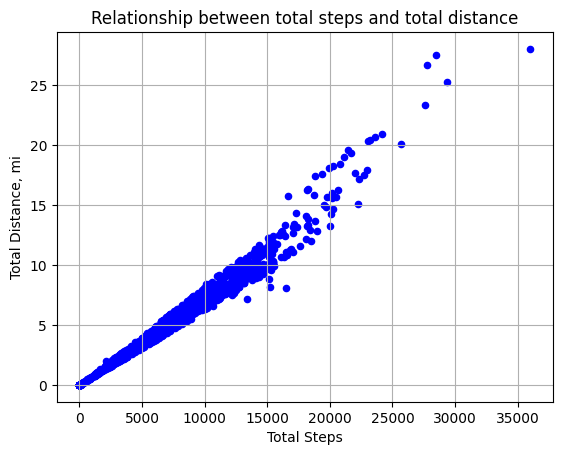

In [50]:
# scatterplot for `TotalSteps` and `TotalDistance`

import matplotlib.pyplot as plt
dly_act_merged.plot.scatter(x='TotalSteps', y='TotalDistance', color='blue', marker='o')
plt.xlabel('Total Steps')
plt.ylabel('Total Distance, mi')
plt.title('Relationship between total steps and total distance')
plt.grid(True)
plt.show()



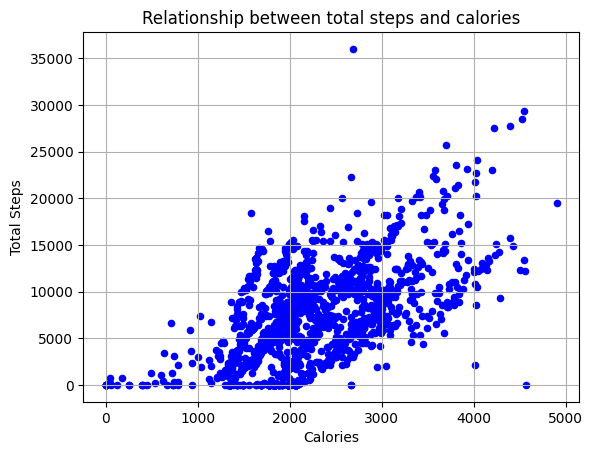

In [51]:
# scatterplot for `TotalSteps` and `Calories`

dly_act_merged.plot.scatter(x='Calories', y='TotalSteps', color='blue', marker='o')
plt.xlabel('Calories')
plt.ylabel('Total Steps')
plt.title('Relationship between total steps and calories')
plt.grid(True)
plt.show()

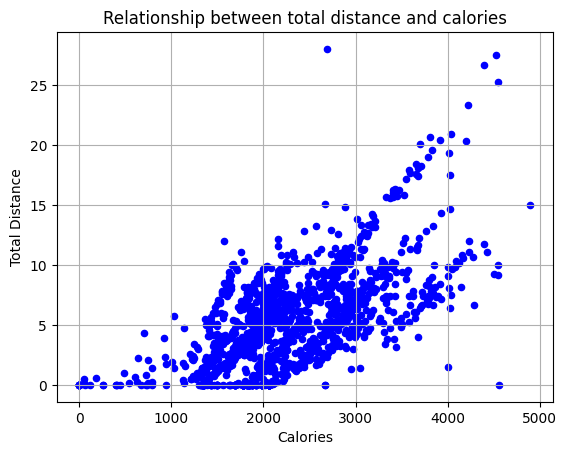

In [52]:
# scatterplot for `TotalDistance` and `Calories`

dly_act_merged.plot.scatter(x='Calories', y='TotalDistance', color='blue', marker='o')
plt.xlabel('Calories')
plt.ylabel('Total Distance')
plt.title('Relationship between total distance and calories')
plt.grid(True)
plt.show()

As might be seen from the above scatterplots, my assumption is correct, and there is a positive correlation between`TotalSteps`, `TotalDistance`, and `Calories`.

I also want to understand how the number of steps change by day of the week and see if there are any noticeable trends.

/tmp/ipykernel_18/3544948896.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_steps_by_dayofweek = dly_act_merged.groupby('DayOfWeek')['TotalSteps'].sum() # aggregating steps


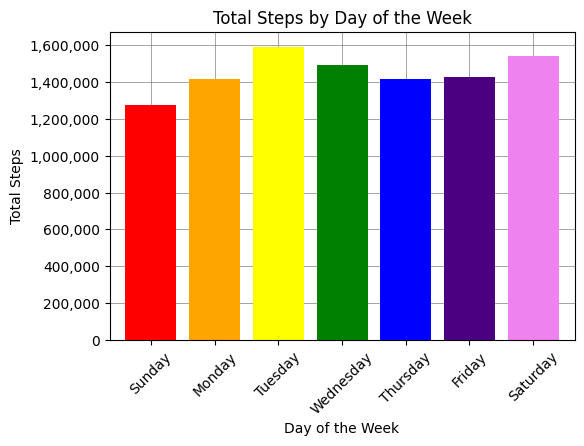

In [53]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# defining colors for each day of the week
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

# setting the order for days of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
dly_act_merged['DayOfWeek'] = pd.Categorical(dly_act_merged['DayOfWeek'], categories=day_order, ordered=True)

# grouping by day of the week and calculating total steps
total_steps_by_dayofweek = dly_act_merged.groupby('DayOfWeek')['TotalSteps'].sum() # aggregating steps

# plotting
plt.figure(figsize=(6, 4))
total_steps_by_dayofweek.plot(kind='bar', color=colors, width=0.8, zorder=2)
plt.xlabel('Day of the Week')
plt.ylabel('Total Steps')
plt.title('Total Steps by Day of the Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
formatter = FuncFormatter(lambda x, _: format(int(x), ',')) # Formatting y-axis ticks with comma separation
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5, zorder=1)

plt.show()

Interestingly though, the total number of steps has a stable pattern over the week, with the fewest number of steps on Sundays, and the highest number on Tuesdays. This might mean that the users are consistent with their daily walking habits.

Now, let's check the calorie burn trends by month.
Note: Assuming that users' calories burned were tracked continuously throughout the months.

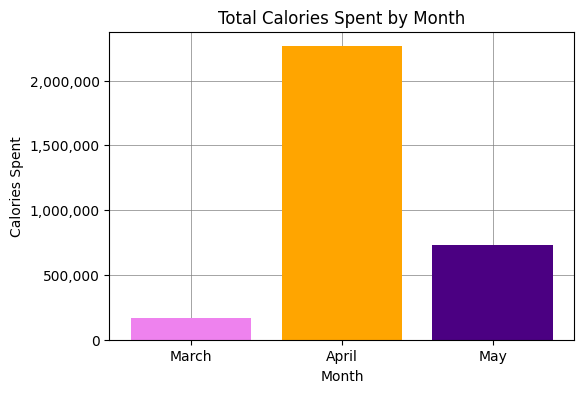

In [54]:
from matplotlib.ticker import ScalarFormatter, FuncFormatter 

# defining a function to format tick labels with commas
def format_with_commas(x, pos):
    return "{:,.0f}".format(x)

# extracting month from 'ActivityDate'
dly_act_merged['Month'] = dly_act_merged['ActivityDate'].dt.month

# grouping by month and aggregating total calories
monthly_calories = dly_act_merged.groupby('Month')['Calories'].sum().reset_index()

# plotting
plt.figure(figsize=(6, 4))
colors = ['violet', 'orange', 'indigo']
plt.bar(monthly_calories['Month'], monthly_calories['Calories'], color=colors, zorder=2)

plt.xlabel('Month')
plt.ylabel('Calories Spent')
plt.title('Total Calories Spent by Month')
plt.xticks(monthly_calories['Month'], ['March', 'April', 'May'])

# formatting y-axis ticks to avoid scientific notation and adding commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))

# setting zorder for grid lines and bars
plt.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5, zorder=0)
plt.gca().set_axisbelow(True)  # ensuring grid lines are behind bars
plt.show()

On an aggregated level, the highest amount of calories burned by users occurred in April, followed by May and March months.

Finally, let's see the aggregated averages for `VeryActiveDistance`, `ModeratelyActiveDistance`, and `LightActiveDistance`, and create a visual for a better understanding.

In [55]:
print(dly_act_merged['VeryActiveDistance'].mean())
print(dly_act_merged['ModeratelyActiveDistance'].mean())
print(dly_act_merged['LightActiveDistance'].mean())

1.3974158904590537
0.5384609863274039
3.1934073011263533


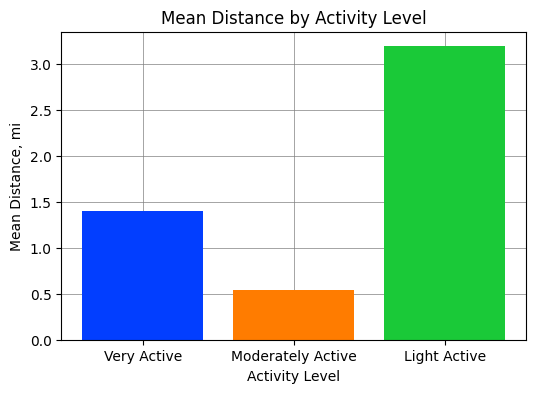

In [56]:
import seaborn as sns  # importing seaborn for color palettes

colors = sns.color_palette('bright')
plt.figure(figsize=(6, 4))
plt.bar(['Very Active', 'Moderately Active', 'Light Active'], 
        [dly_act_merged['VeryActiveDistance'].mean(), dly_act_merged['ModeratelyActiveDistance'].mean(), dly_act_merged['LightActiveDistance'].mean()],
        color=colors, zorder=2)

plt.xlabel('Activity Level')
plt.ylabel('Mean Distance, mi')
plt.title('Mean Distance by Activity Level')
plt.grid(True, which='both', color='gray', linestyle='-', linewidth=0.5, zorder=0)
plt.gca().set_axisbelow(True)  # ensuring grid lines are behind bars
plt.show()

An interesting observation here is that the average `LightActieDistance` is higher than the average of `VeryActiveDistance` and `ModeratelyActiveDistance`. According to [Internet Source](https://www.huffpost.com/entry/how-trackers-can-sabotage-weight-loss_b_9642104#:~:text=1%2C000%20to%2010%2C000%20steps%20or,a%20day%20is%20Highly%20active.):
* 1,000 to 10,000 steps or about 4 miles a day is considered Light Active 
* 10,000 to 23,000 steps or 4 to 10 miles a day is considered Active
* More than 23,000 steps or 10 miles a day is considered Highly active

This observation also confirms our earlier observation that more users fall in the range of making 1,000 to 10,000 steps daily.

In [57]:
# key statistics for the `slp_dy` dataframe

slp_dy[['TotalMinutesAsleep', 'TotalTimeInBed']].describe()


,TotalMinutesAsleep,TotalTimeInBed
count,410.000000,410.000000
mean,419.173171,458.482927
std,118.635918,127.455140
min,58.000000,61.000000
25%,361.000000,403.750000
50%,432.500000,463.000000
75%,490.000000,526.000000
max,796.000000,961.000000


Sleep data shows that the average amount of sleep time among 24 users is 419.2 minutes, which is roughly 7 hours. According to [NIH](https://www.nhlbi.nih.gov/health/sleep/how-much-sleep#:~:text=Experts%20recommend%20that%20adults%20sleep,or%20more%20hours%20a%20night.), recommended sleep duration for adults is between 7 to 9 hours. The average total time in bed is around 458 minutes, or 7.6 hours, which means that on average users are spending around 39 minutes in bed awake. An article from [Sleep Foundation](https://www.sleepfoundation.org/sleep-faqs/how-long-should-it-take-to-fall-asleep#:~:text=Most%20healthy%20people%20fall%20asleep,fall%20asleep%20easily%20every%20night.) states that most healthy people fall asleep within 15 to 20 minutes after lying down.

In [58]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
hrt_rt_merged['Value'].describe()

count   3614915.00
mean         78.14
std          19.22
min          36.00
25%          64.00
50%          74.00
75%          89.00
max         203.00
Name: Value, dtype: float64

The average heart rate among 15 users is 78 beats per minute which is considered normal.

In [59]:
# key statistics for the `hrly_clr_merged` dataframe

hrly_clr_merged['Calories'].describe()

count   46008.00
mean       95.82
std        60.04
min        42.00
25%        62.00
50%        80.00
75%       106.00
max       948.00
Name: Calories, dtype: float64

Data shows that 35 users burned roughly 96 calories per hour on average, with a minimum of 42, and a maximum of 948 calories.

Now, let's aggregate the data by hour and then create a line graph for the average calories burned per hour.

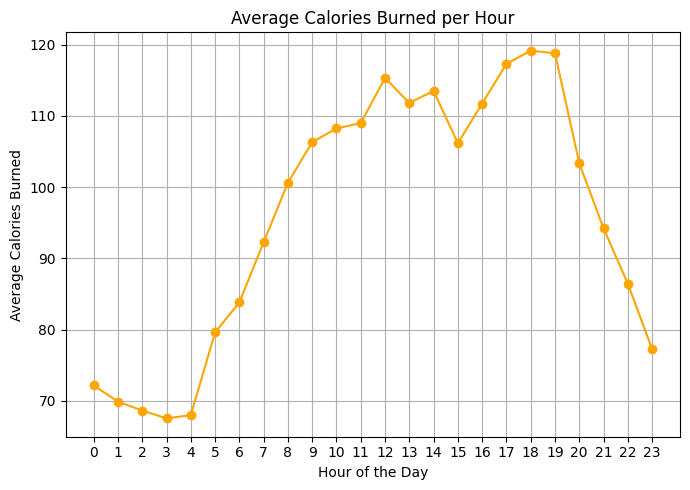

In [60]:
# extracting hour from 'ActivityHour'
hrly_clr_merged['Hour'] = hrly_clr_merged['ActivityHour'].apply(lambda x: x.hour)

# aggregating data by hour and calculating average calories burned per hour
avg_calories_per_hour = hrly_clr_merged.groupby('Hour')['Calories'].mean()

# plotting
plt.figure(figsize=(7, 5))
plt.plot(avg_calories_per_hour.index, avg_calories_per_hour.values, color='orange', marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Calories Burned')
plt.title('Average Calories Burned per Hour')
plt.xticks(range(24))  # setting ticks for each hour
plt.grid(True)
plt.tight_layout()
plt.show()

It can be seen that users burn the highest amount of calories in the afternoon and evening, between 5 pm and 7 pm. In the period from 11 pm to 4 am the calorie burn is the lowest. The trend starts to rise from 5 am, reaching its peak at 6 pm, then steeply going down. It might be assumed that most users start to wake up at 5 am, and go to bed in the period from 8 pm to 10 pm.

In [61]:
# key statistics for the `hrly_stps_merged` dataframe

hrly_stps_merged['StepTotal'].describe()

count   46008.00
mean      302.87
std       677.30
min         0.00
25%         0.00
50%        21.00
75%       323.00
max     10565.00
Name: StepTotal, dtype: float64

The average number of steps per hour is 302, with a maximum of 10565 among 35 users.

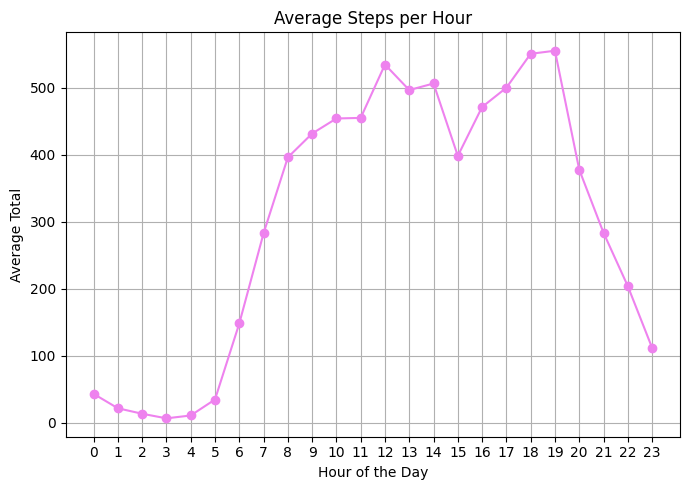

In [62]:
# extracting hour from 'ActivityHour'
hrly_stps_merged['Hour'] = hrly_stps_merged['ActivityHour'].apply(lambda x: x.hour)

# aggregating data by hour and calculating average total steps per hour
avg_steps_per_hour = hrly_stps_merged.groupby('Hour')['StepTotal'].mean()

# plotting
plt.figure(figsize=(7, 5))
plt.plot(avg_steps_per_hour.index, avg_steps_per_hour.values, color='violet', marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Total')
plt.title('Average Steps per Hour')
plt.xticks(range(24))  # setting ticks for each hour
plt.grid(True)
plt.tight_layout()
plt.show()

Unsurprisingly, the average number of steps per hour by users has similar trends compared to the average calories burned per hour by users. The highest number of steps may be observed from 6 pm to 7 pm, whilst the lowest - from midnight until 5 am.

In [63]:
# key statistics for `mnt_MET_merged` dataframe

mnt_MET_merged['METs'].describe()

count   2760120.00
mean         14.46
std          11.80
min           0.00
25%          10.00
50%          10.00
75%          11.00
max         189.00
Name: METs, dtype: float64

As stated in [NIH](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6078558/#:~:text=Exercise%20capacity%20is%20based%20on,METS%20or%20more%20is%20excellent.), *Exercise capacity is based on metabolic equivalents (MET) achieved, (one MET is defined as 3.5 mL O2 uptake/kg per min, which is the resting oxygen uptake in a sitting position). Less than 5 METS is poor, 5–8 METS is fair, 9–11 METS is good, and 12 METS or more is excellent* (cited).

The average MET among 35 users is 14.46 which is a pretty good result. However, as per descriptive statistics, the maximum MET is 189, which might not be possible considering the rational ranges. 

In [64]:
# key statistics for the `wght_log_info_merged` dataframe

wght_log_info_merged[['WeightKg','BMI']].describe()


,WeightKg,BMI
count,98.00,98.00
mean,72.47,25.37
std,14.82,3.56
min,52.60,21.45
25%,61.50,24.00
50%,62.50,24.39
75%,85.25,25.59
max,133.50,47.54


The average weight among 13 users is 72.47 kg, and the average Body Mass Index (BMI) is 25.37. Since we don't have information on the height of the users, as well as their gender, it is hard to make conclusions from the average weight data. However, BMI numbers can give us some information, although very limited, due to a low number of users. According to Internet [Source](https://www.nhsinform.scot/healthy-living/food-and-nutrition/healthy-eating-and-weight-loss/body-mass-index-bmi/#:~:text=Your%20BMI%20will%20fit%20into,This%20is%20described%20as%20obesity), there are 5 main BMI ranges: 
* under 18.5 – underweight
* between 18.5 and 24.9 – ‘healthy range’
* between 25 and 29.9 – overweight
* between 30 and 39.9 – obesity
* 40 or over – severe obesity

The average BMI of 25.37 tells us that the users might be overweight.

# Step 6: Act

Key stages:

**1. Providing my top high-level insights based on the analysis**

The number of users who participated in the analysis is low, that might not represent the whole population. Further, the absence of information on users' age, gender, physical wellness, and height has made this analysis limited in nature. In my analysis, I assumed that users are average healthy adults.

Based on the analysis I came up with the following conclusions:

* The average number of steps made by users was lower than the recommended norm determined for healthy adults.

* Although users' results for very active daily minutes are impressive, they nevertheless spend considerably more time in a sedentary lifestyle, rather than the recommended norm.

* Users were taking the highest number of steps on Tuesdays and the lowest number of steps on Sundays. The overall trend for the total number of steps was stable throughout the week.

* The highest amount of calories burned by users occurred in April, followed by May and March months.

* Analysis of average distance by activity level showed us that the light active distance covered by users is significantly higher than that of very active and moderately active distances. This further confirmed our assumption that users were underperforming in terms of total steps made.

* Users' sleep duration was within recommended norms for adults. However, after going to bed, users stayed awake longer, rather than average healthy people should.

* Both the average number of steps per hour and average calories burned per hour by users have similar trends with the highest numbers between 5 pm and 7 pm, and the lowest numbers between 11 pm to 5 am. Users start to wake up at around 5 am and start to go to bed at 8 pm - 10 pm.

* Although very limited, the data on BMI showed us that less than half of users surveyed might be overweight.


**2. Based on the above findings my recommendations for Bellabeat products usage would be:**

* Ask users to provide more details when starting to use the Bellabeat app. Details should also include age, gender, height, and physical wellness. This will allow us to get a more in-depth analysis of user patterns.

* To get consistent usage of products, provide incentives and discounts when users buy Bellabeat membership and agree to the terms of using the program consistently.

* Organize online marathons among users with virtual gifts, especially on Sundays, so that users reach the daily recommended number of steps.

* Include alerts and notifications for Leaf product of Bellabeat, so that when users don't make enough steps during a day or don't burn enough calories, they get a reminder.

* Since Leaf and Time products of Bellabeat are worn by users, and are also tracking stress levels, ask the products to send reminders to users to meditate before sleep, so that they fall asleep faster and easier.

* Since drinking water is essential, and for our analysis, we didn't have any information on water consumption, make additional discounts/incentives campaigns for users who would like to buy Spring products. For example, "Get our Spring for half price, if 2 more people are buying it through your invitation".

